In [173]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [174]:
df = pd.read_csv('C:/Users/noelm/OneDrive/Desktop/MSc/SEMESTER 2/AML/Test_excercise/Dataset - Dataset.csv')
df.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [175]:
df.isnull().sum()

over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

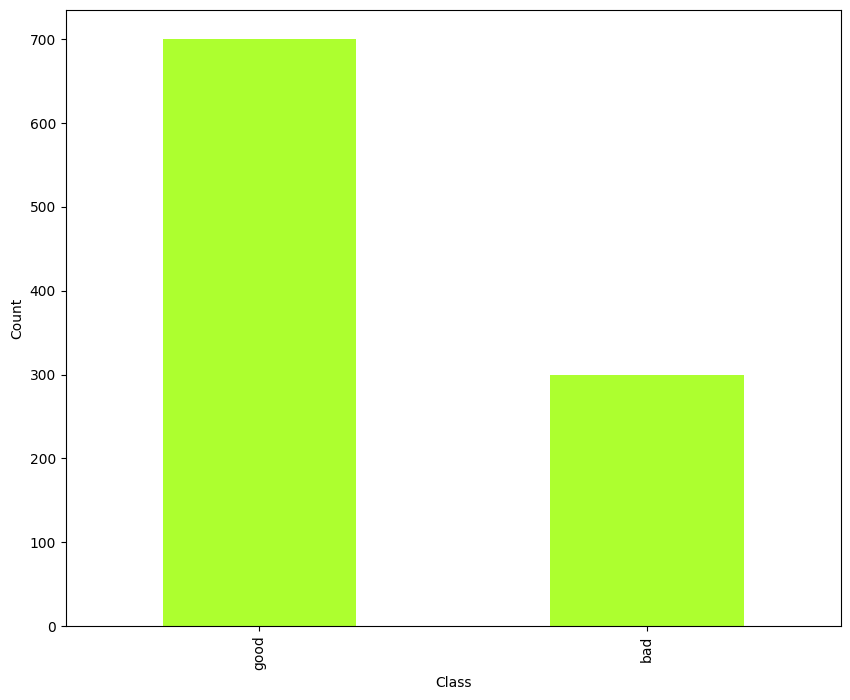

In [176]:
class_counts = df['class'].value_counts()


plt.figure(figsize=(10,8))
class_counts.plot(kind= 'bar', color = 'GreenYellow')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show

In [177]:
df = df.drop(['other_parties', 'own_telephone', 'location'], axis=1)

In [178]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
categorical_columns

,over_draft,credit_history,purpose,Average_Credit_Balance,employment,personal_status,property_magnitude,other_payment_plans,housing,job,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,real estate,none,own,skilled,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,real estate,none,own,skilled,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,real estate,none,own,unskilled resident,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,life insurance,none,for free,skilled,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,no known property,none,for free,skilled,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,existing paid,furniture/equipment,<100,4<=X<7,female div/dep/mar,real estate,none,own,unskilled resident,yes,good
996,<0,existing paid,used car,<100,1<=X<4,male div/sep,life insurance,none,own,high qualif/self emp/mgmt,yes,good
997,no checking,existing paid,radio/tv,<100,>=7,male single,car,none,own,skilled,yes,good
998,<0,existing paid,radio/tv,<100,1<=X<4,male single,no known property,none,for free,skilled,yes,bad


In [179]:
from sklearn import preprocessing

df1= df.copy()

labelencoder = preprocessing.LabelEncoder()

for col in categorical_columns:
    df1[col] = labelencoder.fit_transform(df1[col])

In [180]:
df1

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,personal_status,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
0,1,6,1,6,1169,4,3,3,4,3,67,1,1,2,1,1,1,1
1,0,48,3,6,5951,2,0,0,2,3,22,1,1,1,1,1,1,0
2,3,12,1,2,2096,2,1,3,3,3,49,1,1,1,3,2,1,1
3,1,42,3,3,7882,2,1,3,4,1,45,1,0,1,1,2,1,1
4,1,24,2,4,4870,2,0,3,4,2,53,1,0,2,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,3,1736,2,1,0,4,3,31,1,1,1,3,1,1,1
996,1,30,3,9,3857,2,0,1,4,1,40,1,1,1,0,1,1,1
997,3,12,3,6,804,2,3,3,4,0,38,1,1,1,1,1,1,1
998,1,45,3,6,1845,2,0,3,4,2,23,1,0,1,1,1,1,0


# **Correlation Matrix**

In [181]:
cor_matrix = df1.corr()
cor_matrix

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,personal_status,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
over_draft,1.000000,-0.096005,-0.110683,0.091150,-0.092638,0.097452,-0.030032,0.049073,0.008835,-0.019556,0.083636,0.052184,-0.012511,0.084513,-0.029085,0.030417,-0.014658,0.302406
credit_usage,-0.096005,1.000000,0.029430,-0.002025,0.624984,0.020843,0.003824,0.099678,0.034067,-0.163388,-0.036136,0.003559,-0.157049,-0.011284,-0.215438,-0.023834,0.138196,-0.214927
credit_history,-0.110683,0.029430,1.000000,-0.020981,0.029050,-0.031958,-0.088158,-0.080282,-0.086987,-0.040035,-0.157261,0.040499,0.084026,-0.387820,-0.013921,-0.070008,0.000513,-0.097054
purpose,0.091150,-0.002025,-0.020981,1.000000,0.052295,0.085496,0.079626,0.053269,0.062940,-0.025888,0.033211,0.026999,-0.063321,-0.022895,-0.072347,0.025098,0.008556,0.138152
current_balance,-0.092638,0.624984,0.029050,0.052295,1.000000,0.070127,0.038756,0.114810,0.028926,-0.139859,0.032716,-0.020224,-0.135632,0.020795,-0.261139,0.017142,0.050050,-0.154739
Average_Credit_Balance,0.097452,0.020843,-0.031958,0.085496,0.070127,1.000000,0.056865,0.035129,0.038741,0.040929,0.094760,0.000726,-0.032711,0.015568,-0.040662,0.023693,-0.012566,0.103133
employment,-0.030032,0.003824,-0.088158,0.079626,0.038756,0.056865,1.000000,0.048533,0.218838,-0.022536,0.289741,-0.052460,-0.126529,0.085495,-0.142279,0.028019,0.064760,-0.008932
personal_status,0.049073,0.099678,-0.080282,0.053269,0.114810,0.035129,0.048533,1.000000,0.020201,0.015354,0.177153,0.006637,-0.245949,0.112438,-0.040375,0.253574,-0.049099,0.089535
residence_since,0.008835,0.034067,-0.086987,0.062940,0.028926,0.038741,0.218838,0.020201,1.000000,0.008860,0.266419,-0.039284,-0.011941,0.089625,0.000450,0.042643,0.054097,-0.002967
property_magnitude,-0.019556,-0.163388,-0.040035,-0.025888,-0.139859,0.040929,-0.022536,0.015354,0.008860,1.000000,0.125947,0.002965,-0.100211,-0.001577,0.211556,0.066592,-0.108188,0.055529


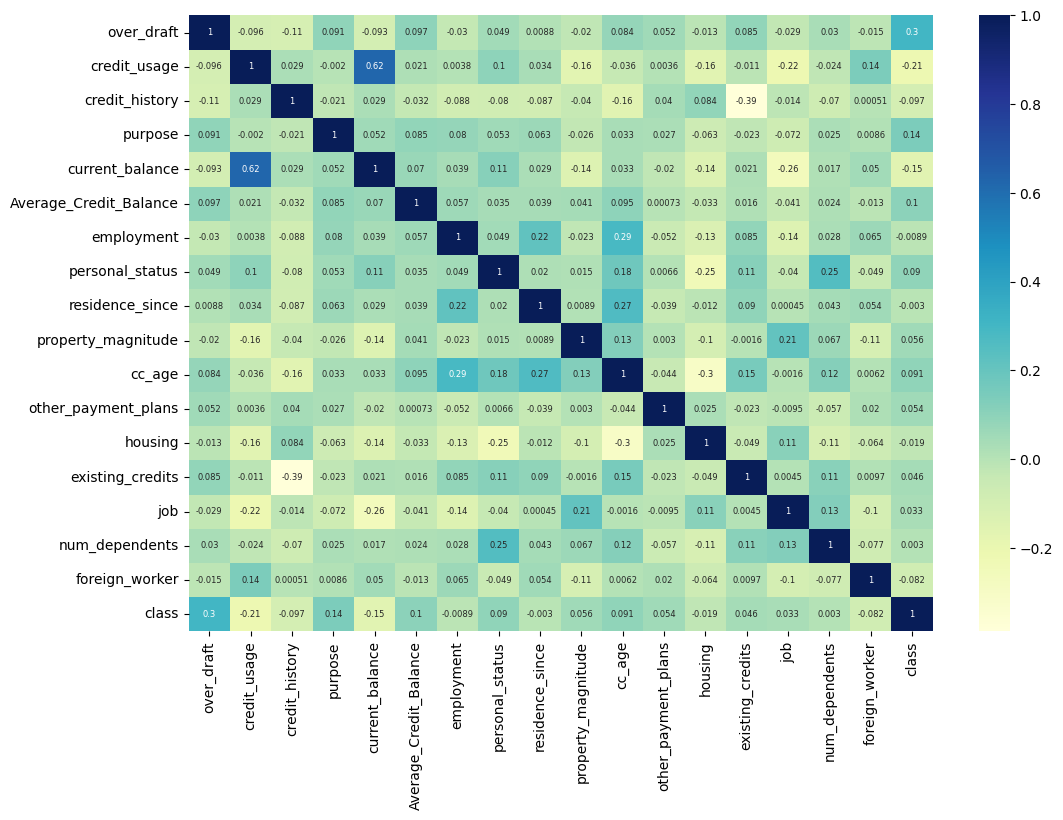

In [182]:
plt.figure(figsize=(12,8))
sns.heatmap(cor_matrix, annot=True, cmap = 'YlGnBu', annot_kws={"size" : 6})
plt.show()

In [183]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64']) 


**PCA**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)




### **LOGISTIC REGRESSION** 


In [184]:
x= df1[['over_draft', 'purpose', 'credit_usage']]
y = df['class']

In [185]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [195]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_resampled, y_resampled)

LogisticRegression()

In [196]:
y_pred = logReg.predict(x_test)

In [197]:
from imblearn.over_sampling import SMOTE
import pandas as pd


smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(x, y)




In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 65,  26],
       [ 69, 140]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

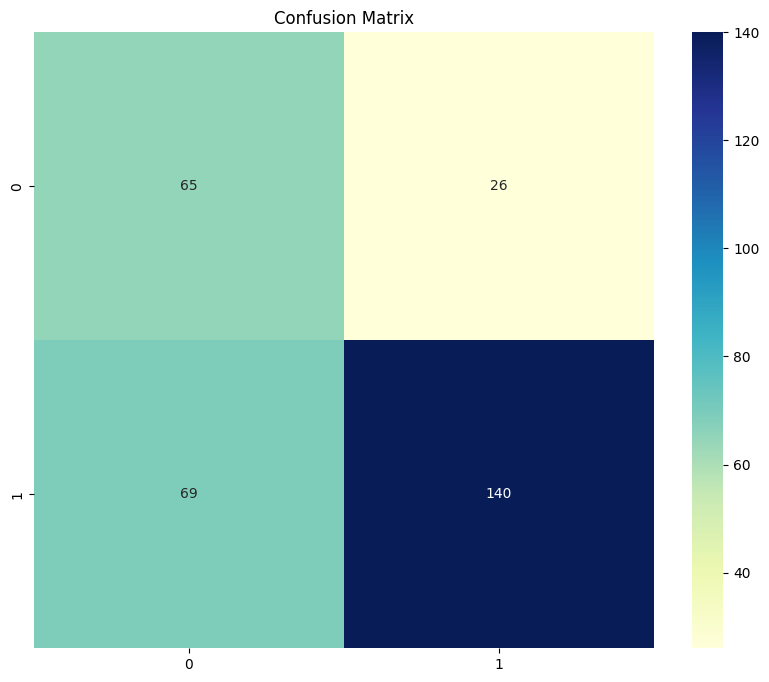

In [199]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt= 'g')
plt.title('Confusion Matrix')

In [200]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.6833333333333333


In [201]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p = 2)

KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [202]:
ypred = KNN.predict(x_test)
accuracy = accuracy_score(y_test, ypred)
accuracy

0.66